In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/Weather Data.csv')

In [ ]:
df.shape

(8784, 8)

In [ ]:
df.sample(5)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
2316,04-06-2012 12:00,6.6,-8.3,34,20,48.3,101.24,Mainly Clear
207,01-09-2012 15:00,-1.0,-5.1,74,9,24.1,101.13,Mostly Cloudy
3413,5/22/2012 5:00,18.8,16.4,86,4,12.9,100.90,Drizzle
7664,11/15/2012 8:00,-2.1,-5.1,80,11,24.1,102.99,Cloudy
4694,7/14/2012 14:00,32.7,15.3,35,28,48.3,101.35,Mainly Clear


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


**This Canada dataset appears to represent hourly weather observations from January 1, 2012 to December 1, 2012.**

**`Date/Time`**: The timestamp of the weather observation, recorded hourly.<br>
**`Temp_C (°C)`**: The temperature in degrees Celsius.<br>
**`Dew Point Temp_C (°C)`**: The temperature at which the air becomes fully saturated with moisture (i.e., 100% relative humidity). Below this temperature, condensation occurs, forming dew or frost.<br>
**`Rel Hum_% (Relative Humidity in %)`**: The amount of moisture in the air, as a percentage of the maximum amount the air could hold at that temperature.<br>
**`Wind Speed_km/h`**: Wind speed, measured in kilometers per hour.<br>
**`Visibility_km`**: The distance one can clearly see, measured in kilometers.<br>
**`Press_kPa (Pressure in kPa)`**: Atmospheric pressure, measured in kilopascals (kPa). This indicates the weight of the atmosphere above the Earth’s surface.<br>
`Weather`: The observed weather conditions (e.g., Fog, Freezing Drizzle, Cloudy, Rain, etc.).

In [ ]:
df[['Date','Time']]=df['Date/Time'].str.split(' ',expand=True)

In [ ]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time
0,01-01-2012 00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,01-01-2012,00:00
1,01-01-2012 01:00,-1.8,-3.7,87,4,8.0,101.24,Fog,01-01-2012,01:00
2,01-01-2012 02:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",01-01-2012,02:00
3,01-01-2012 03:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",01-01-2012,03:00
4,01-01-2012 04:00,-1.5,-3.3,88,7,4.8,101.23,Fog,01-01-2012,04:00


In [ ]:
df.drop('Date/Time', axis=1, inplace=True)

In [ ]:
df['Date']=df['Date'].str.replace('/','-')

In [ ]:
df['Date'] = df['Date'].str.split('-')

In [ ]:
date = df['Date'].to_list()
data = pd.DataFrame(date, columns=['Month','Day','Year'])

In [ ]:
# data['Date'] = data['Day'] + "-" + data['Month'] + "-" + data['Year']
# data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

**Feature Engineering** <br>
- To analyze time-based trends, extracting year, month, day, and hour from the Date and Time columns.

In [ ]:
df['Day'] = data['Day'].astype(int)
df['Month'] = data['Month'].astype(int)
df['Year'] = data['Year'].astype(int)

In [ ]:
df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time,Day,Month,Year
0,-1.8,-3.9,86,4,8.0,101.24,Fog,"[01, 01, 2012]",00:00,1,1,2012
1,-1.8,-3.7,87,4,8.0,101.24,Fog,"[01, 01, 2012]",01:00,1,1,2012
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog","[01, 01, 2012]",02:00,1,1,2012
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog","[01, 01, 2012]",03:00,1,1,2012
4,-1.5,-3.3,88,7,4.8,101.23,Fog,"[01, 01, 2012]",04:00,1,1,2012


In [ ]:
df.drop('Date', axis=1, inplace=True)

In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

Extracting Hours from Time.

In [ ]:
df['Hour'] = df['Time'].apply(lambda x: x.hour)
# df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

In [ ]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Day,Month,Year,Hour
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.0,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623,15.756831,6.513661,2012.0,11.500000
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005,8.812031,3.451430,0.0,6.922581
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,1.000000,1.000000,2012.0,0.000000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000,8.000000,4.000000,2012.0,5.750000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000,16.000000,7.000000,2012.0,11.500000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000,23.000000,10.000000,2012.0,17.250000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000,31.000000,12.000000,2012.0,23.000000


In [ ]:
df['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

### EDA (Exploratory Data Analyst)

In [ ]:
df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Weather', 'Time', 'Day', 'Month', 'Year',
       'Hour'],
      dtype='object')

Identify outliers in important metrics like temperature, humidity, etc.



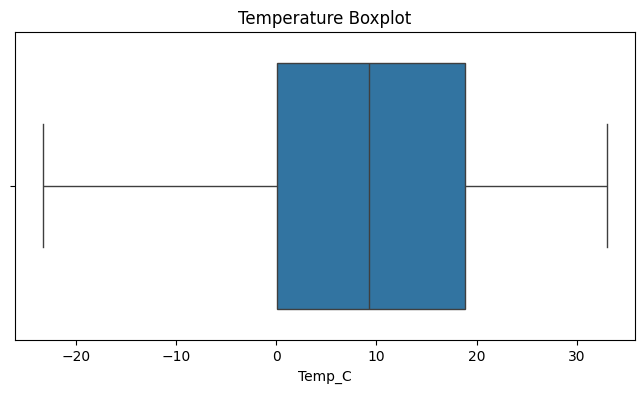

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Temp_C'])
plt.title('Temperature Boxplot')
plt.show()

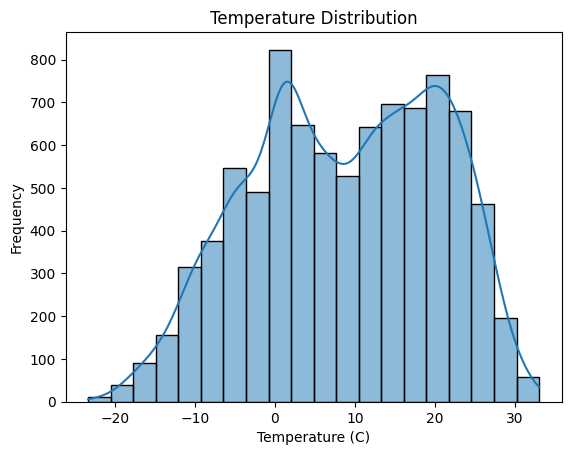

In [ ]:
sns.histplot(df['Temp_C'],bins=20 ,kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.show()

Look at the relationships between variables using pair plots.

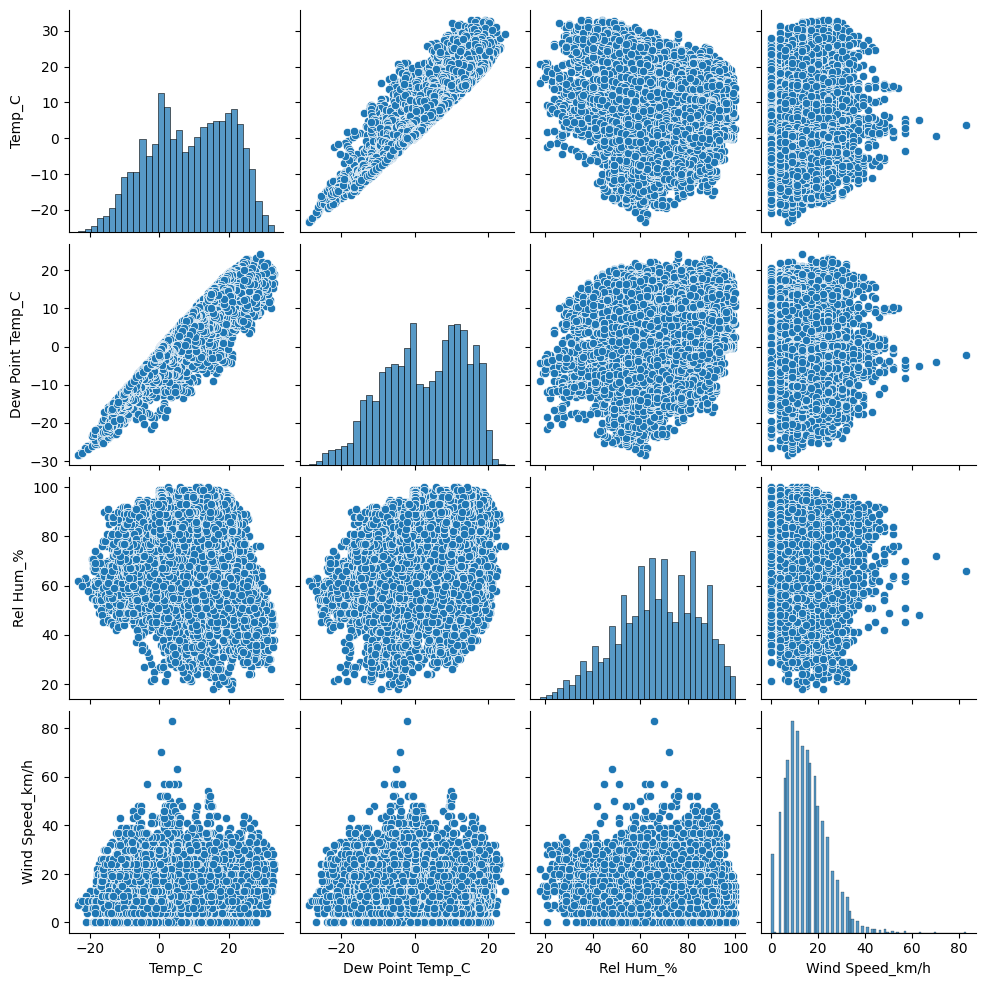

In [ ]:
sns.pairplot(df[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h']])
plt.show()

Analyze trends in temperature, humidity, and other weather parameters over time.



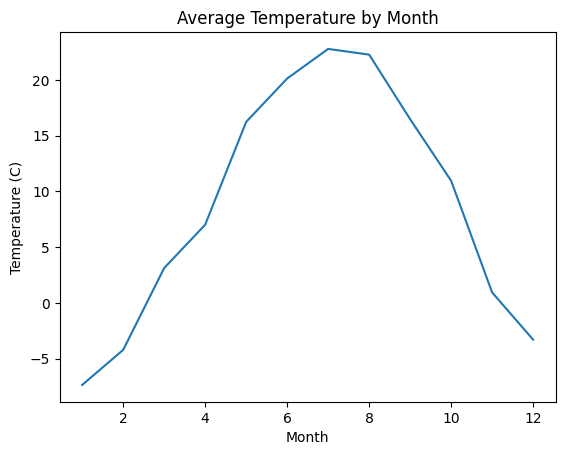

In [ ]:
df.groupby('Month')['Temp_C'].mean().plot(kind='line')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.show()

Checking for seasonality in weather patterns by comparing metrics across months.



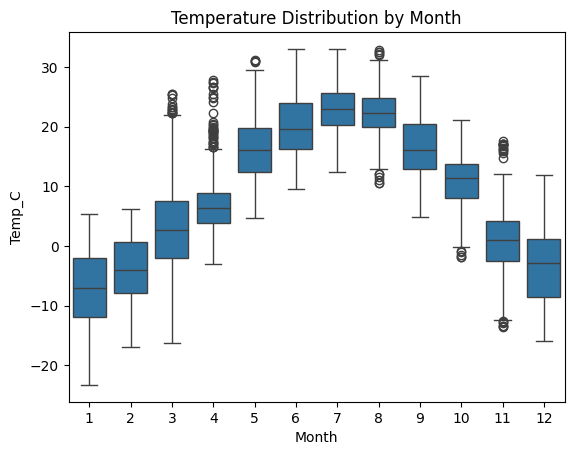

In [ ]:
sns.boxplot(x='Month', y='Temp_C', data=df)
plt.title('Temperature Distribution by Month')
plt.show()

Examine the frequency distribution of different weather conditions.



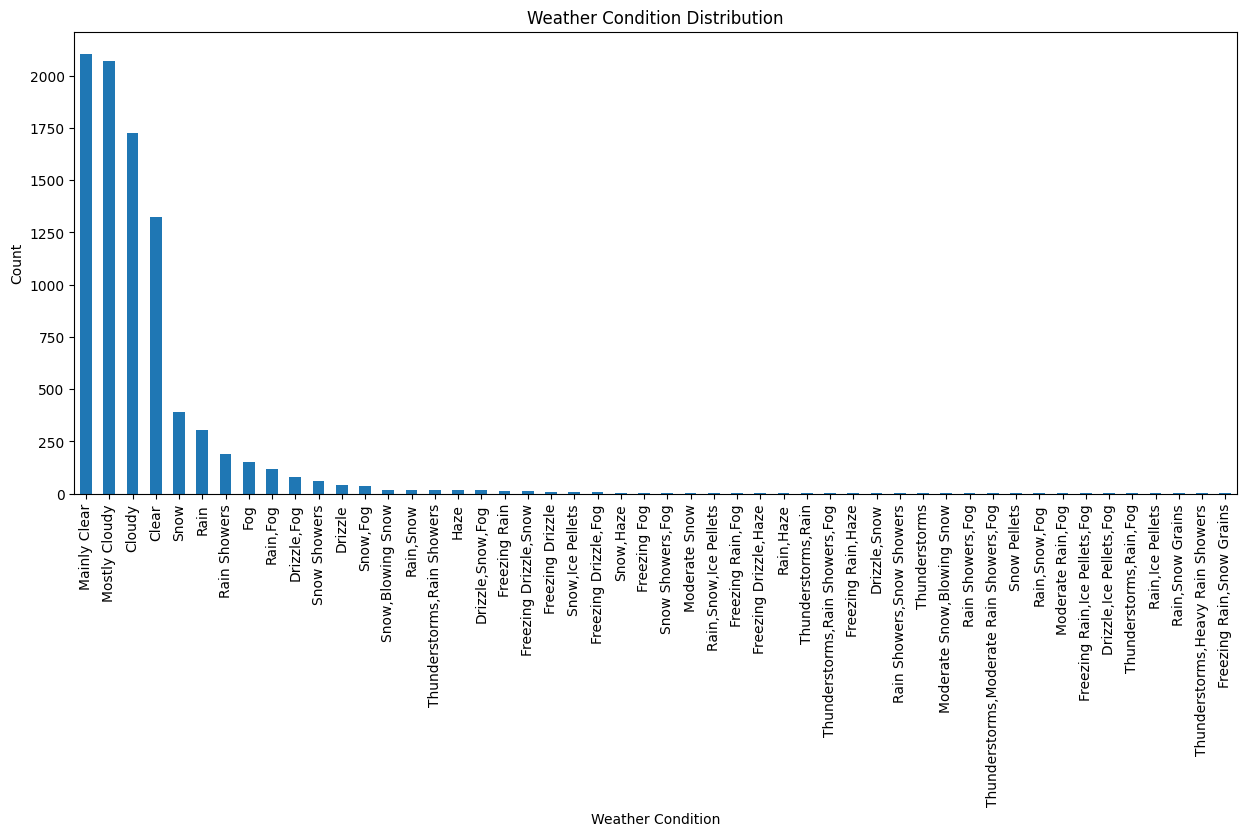

In [ ]:
plt.figure(figsize=(15,6))
df['Weather'].value_counts().plot(kind='bar')
plt.title('Weather Condition Distribution')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

Check the correlation between different weather variables.



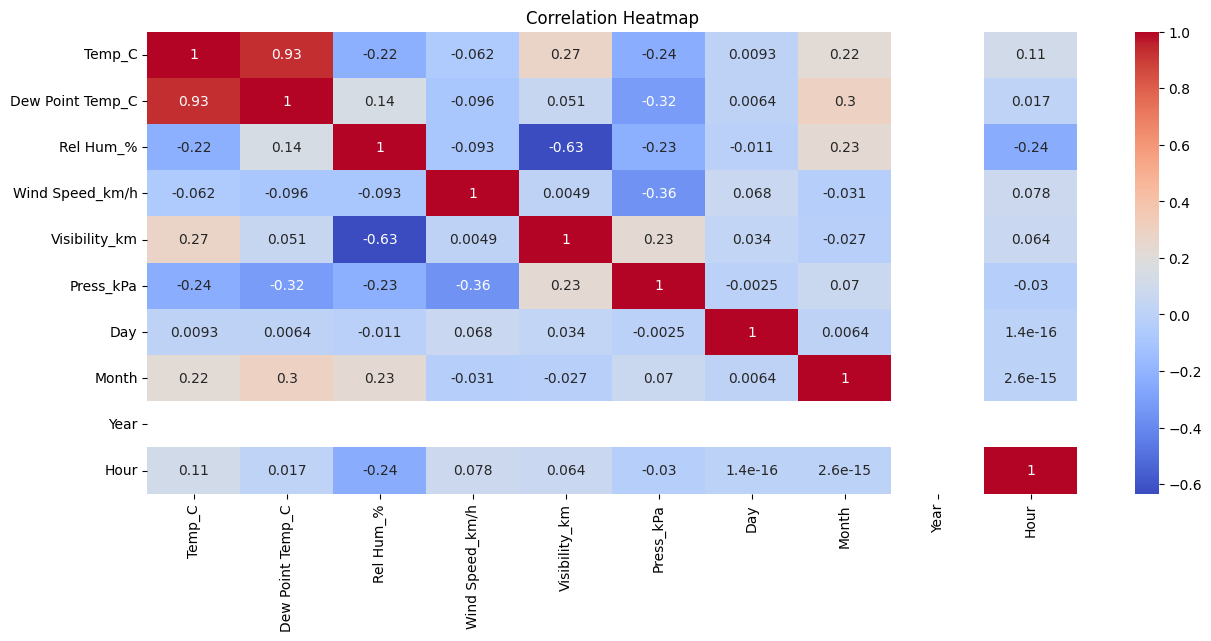

In [ ]:
plt.figure(figsize=(15,6))
numerical_df = df.select_dtypes(include=['float', 'int'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Investigate specific relationships, such as wind speed vs. visibility.



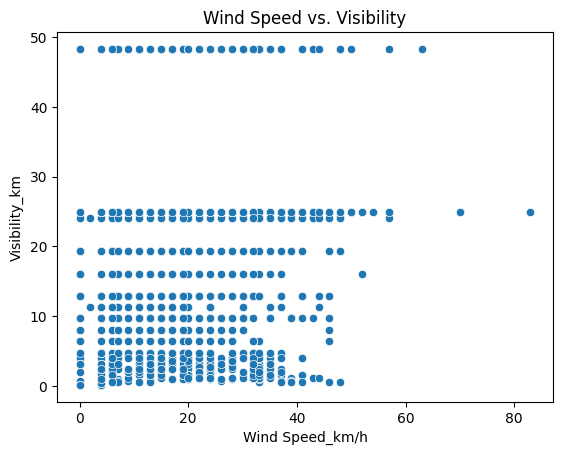

In [ ]:
sns.scatterplot(x='Wind Speed_km/h', y='Visibility_km', data=df)
plt.title('Wind Speed vs. Visibility')
plt.show()

Calculate rolling averages for temperature to smooth short-term fluctuations.



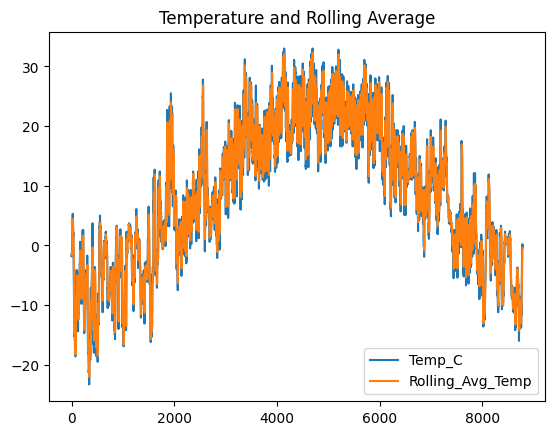

In [ ]:
df['Rolling_Avg_Temp'] = df['Temp_C'].rolling(window=7).mean()

# Plot the rolling average
df[['Temp_C', 'Rolling_Avg_Temp']].plot()
plt.title('Temperature and Rolling Average')
plt.show()

Create lag features to study the impact of previous time steps on the current value.



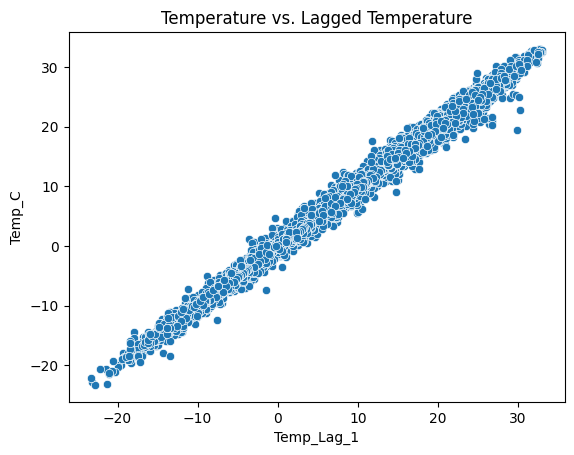

In [ ]:
df['Temp_Lag_1'] = df['Temp_C'].shift(1)

# Scatter plot to see correlation between current and previous temperature
sns.scatterplot(x='Temp_Lag_1', y='Temp_C', data=df)
plt.title('Temperature vs. Lagged Temperature')
plt.show()

Cluster the data based on temperature, humidity, and wind speed.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


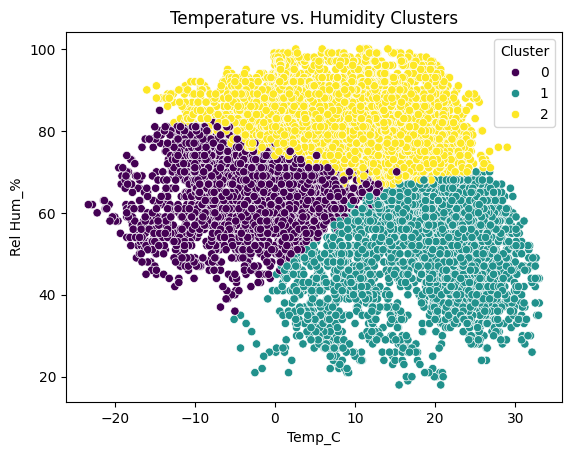

In [ ]:
from sklearn.cluster import KMeans

# Select features for clustering
X = df[['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
sns.scatterplot(x='Temp_C', y='Rel Hum_%', hue='Cluster', data=df, palette='viridis')
plt.title('Temperature vs. Humidity Clusters')
plt.show()